# Challenge

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Files to load
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Total rides by city type 
tot_rides_by_city_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
tot_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# Total drivers by city types
pyber_data_df_by_type_city_df=pyber_data_df.groupby(["type","city"]).mean()
tot_drivers_by_city_type=pyber_data_df_by_type_city_df.groupby(["type"]).sum()["driver_count"]
tot_drivers_by_city_type

type
Rural         78.0
Suburban     490.0
Urban       2405.0
Name: driver_count, dtype: float64

In [8]:
# Total fares by city types
tot_fares_by_city_type=pyber_data_df.groupby(["type"]).sum()["fare"]
tot_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
# Average fare by ride by city types
avg_fare_by_ride_city_type=tot_fares_by_city_type / tot_rides_by_city_type
avg_fare_by_ride_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# Average fare by driver by city types
avg_fare_by_driver_city_type=tot_fares_by_city_type / tot_drivers_by_city_type
avg_fare_by_driver_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
# Building the summary DataFrame
pyber_summary_df = pd.DataFrame(
          {"Total Rides": tot_rides_by_city_type,
          "Total Drivers": tot_drivers_by_city_type,
          "Total Fares": tot_fares_by_city_type,
          "Average Fare by Ride": avg_fare_by_ride_city_type,
          "Average Fare by Driver": avg_fare_by_driver_city_type})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare by Ride,Average Fare by Driver
type,,,,,
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


## The Summary DataFrame

In [12]:
# Remove index name
pyber_summary_df.index.name = None

# Formatting columns the summary DataFrame
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare by Ride"] = pyber_summary_df["Average Fare by Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare by Driver"] = pyber_summary_df["Average Fare by Driver"].map("${:,.2f}".format)

#Display formatted summary
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare by Ride,Average Fare by Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


---

In [13]:
# Renaming teh merged DataFrame
pyber_data_renamed_df=pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_renamed_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#Setting Date as index
pyber_data_renamed_df=pyber_data_renamed_df.set_index(["Date"])
pyber_data_renamed_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [15]:
# Creating a new DataFrame
pyber_data_by_date_df=pyber_data_renamed_df[["City Type","Fare"]].copy()
pyber_data_by_date_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [16]:
# Checking DataFrame info
pyber_data_by_date_df.index.dtype

dtype('O')

In [17]:
#  Setting the index to the datetime data type
pyber_data_by_date_df.index=pd.to_datetime(pyber_data_by_date_df.index)
pyber_data_by_date_df.index.dtype

dtype('<M8[ns]')

In [18]:
# Checking that DataFrame data are the same
pyber_data_by_date_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [19]:
# Creating a new DataFrame by City Type and by Date
pyber_data_by_city_type_by_date_df=pyber_data_by_date_df.groupby(["City Type","Date"]).sum()
pyber_data_by_city_type_by_date_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [20]:
# Creating the Pivot Table DataFrame
pyber_pivot_table_df = pd.pivot_table(pyber_data_by_city_type_by_date_df,
                                      values="Fare",
                                      index="Date",
                                      columns="City Type")
pyber_pivot_table_df.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [21]:
# Creating a new DataFrame based on the targeted time frame
pyber_pivot_table_timeframe_df=pyber_pivot_table_df.loc['2019-01-01':'2019-04-28']
pyber_pivot_table_timeframe_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [22]:
# Creating a new DataFrame in weekly bins
pyber_pivot_table_timeframe_weekly_df=pyber_pivot_table_timeframe_df.resample("W",closed="right").sum()
pyber_pivot_table_timeframe_weekly_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


## Multiple-Line Plot

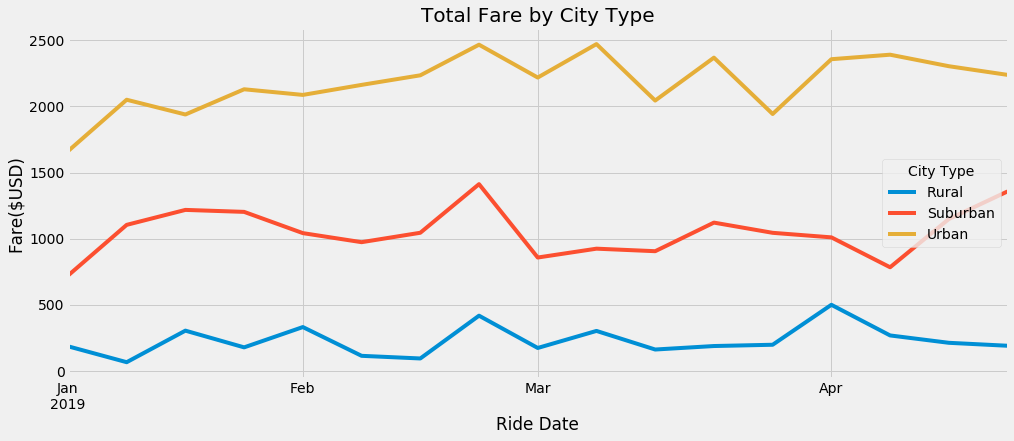

In [23]:
# Plotting and saving the chart
plt.style.use('fivethirtyeight')
ax = pyber_pivot_table_timeframe_weekly_df.plot(figsize=(15, 6))
ax.set_xlabel("Ride Date")
ax.set_ylabel("Fare($USD)")
ax.set_title("Total Fare by City Type",fontsize=20)
plt.savefig("Analysis/Fig_Challenge.png", bbox_inches='tight')
plt.show()